# View attack results data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import sys
import os.path
import sqlite3
import pprint
stdout = sys.stdout
pp = pprint.PrettyPrinter(indent=4)
#pd.set_option('display.max_colwidth', 0)

conn = sqlite3.connect(os.path.join('results','current.db'))
dfRes = pd.read_sql('select * from results',conn)
display(dfRes.head())


,atk_type,atk_sub_type,sys_type,sys_ver,sys_ver_num,atk_date,num_guess,num_right,total_trials,reason
0,simpleListUsers,Select star,reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed
1,simpleListUsers,Select AID column,reference,0.0.387,38700000,2021-02-10,100,100,100,
2,simpleHardDifference,"Simple hard difference attack with lone woman, victim does not have attribute",reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed
3,simpleStrongSuppressDetect,"Simple strong detect suppression attack, one of two known, victim present",reference,0.0.387,38700000,2021-02-10,0,0,100,
4,justTesting,Just testing a new conditionsSql,reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed


### Let's look at the number of attacks per attack version

<AxesSubplot:xlabel='sys_ver'>

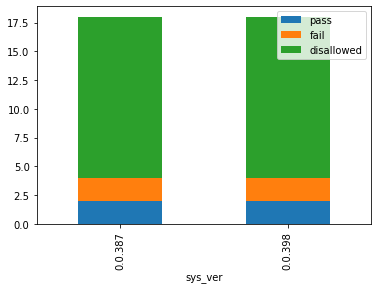

In [100]:
sys_gb_disallowed = dfRes.loc[dfRes['reason'] == 'disallowed'].groupby(['sys_ver'])
sys_gb_pass = dfRes.loc[dfRes['num_right'] > 0].groupby(['sys_ver'])
sys_gb_fail = dfRes.loc[(dfRes['num_right'] == 0) & (dfRes['reason'] != 'disallowed')].groupby(['sys_ver'])
s_pass = sys_gb_pass['atk_sub_type'].nunique()
s_fail = sys_gb_fail['atk_sub_type'].nunique()
s_disallowed = sys_gb_disallowed['atk_sub_type'].nunique()
df = pd.DataFrame({ 'pass': s_pass, 'fail': s_fail, 'disallowed': s_disallowed })
df.plot.bar(stacked=True)

### Let's see how many different attack versions there are

### Let's get the most recent results, and see which attacks have some success

In [103]:
max_ref = dfRes['sys_ver_num'].max()
dfLatest = dfRes.loc[dfRes['sys_ver_num'] == max_ref]
# These are the results where at least one guess was made
dfWithGuess = dfLatest.loc[dfLatest['num_guess'] > 0]
# Add a column which is the confidence score
dfWithGuess['confidence'] = dfWithGuess.apply(lambda row: row.num_right / row.num_guess, axis=1)
dfPass = dfWithGuess.loc[dfWithGuess['confidence'] > 0]
display(dfPass[['atk_sub_type','confidence','num_guess']])

,atk_sub_type,confidence,num_guess
31,Simple averaging attack to learn exact count,1.0,40
35,"First derivitive difference attack with single NAND, victim does not have attribute",1.0,79


### And which attacks fail completely

In [105]:
dfFail = dfWithGuess.loc[(dfWithGuess['confidence'] == 0) & (dfWithGuess['reason'] != 'disallowed')]
display(dfFail[['atk_sub_type','confidence','num_guess']])

,atk_sub_type,confidence,num_guess
18,"Simple hard difference attack with lone woman, victim does not have attribute",0.0,100
20,Just testing a new conditionsSql,0.0,100
21,"Simple soft difference attack with lone woman, victim does not have attribute",0.0,100
22,"Simple soft difference attack with NAND'd AND group, victim does not have attribute",0.0,100
23,"Simple soft difference attack with NAND'd AND group, victim has attribute",0.0,100
24,"Simple soft difference attack with single NAND, victim has attribute",0.0,100
25,"Simple soft difference attack with single NAND, victim does not have attribute",0.0,100
26,"Simple soft difference attack with OR'd AND group, victim does not have attribute",0.0,100
27,"Simple soft difference attack with OR'd AND group, victim has attribute",0.0,100
28,"Simple soft difference attack with single OR, victim has attribute",0.0,100
